In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

# Bank client data:
1. age (numeric)

2. job: type of job (categorical : "admin", "bluecollar", "entrepreneur", "housemaid", "management", "retired", "selfemployed", "services", "student", "technician", "unemployed", "unknown").

3. marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education: education of individual (categorical: "basic.4y",  "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

#### Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: "cellular","telephone")
9. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
10. dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
#### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. concave points_se: standard error for number of concave portions of the contour
20. euribor3m: euribor 3 month rate - daily indicator (numeric)
21. nr.employed: number of employees - quarterly indicator (numeric)
#### Output variable (desired target):
22. y: has the client subscribed a term deposit? (binary: "yes","no")


In [2]:
df = pd.read_csv(r'bank.csv', delimiter=';', encoding='utf-8', header=0,index_col=None)  


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
for i in df.columns:
    print({i:df[i].unique()})

{'age': array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)}
{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)}
{'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object)}
{'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)}
{'default': array(['no', 'unknown', 'yes'], dtype=object)}
{'housing': array(['no', 'yes', 'unknown'], dtype=object)}
{'loan': array(['no', 'yes', 'unknown'], dtype=object)}
{'c

The dataset, consisting of 41188 records and 21 fields, is free of special characters and missing values.

# Visualtion of Data

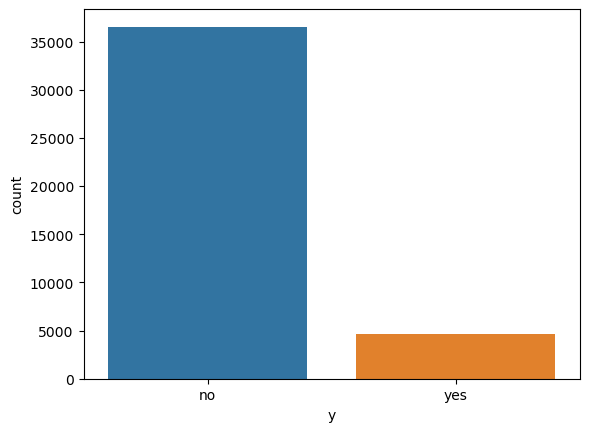

In [7]:
sns.countplot(data=df,x=df.y)
plt.show()

The incredibly low percentage of "yes" responses leads us to the conclusion that the data is out of balance.

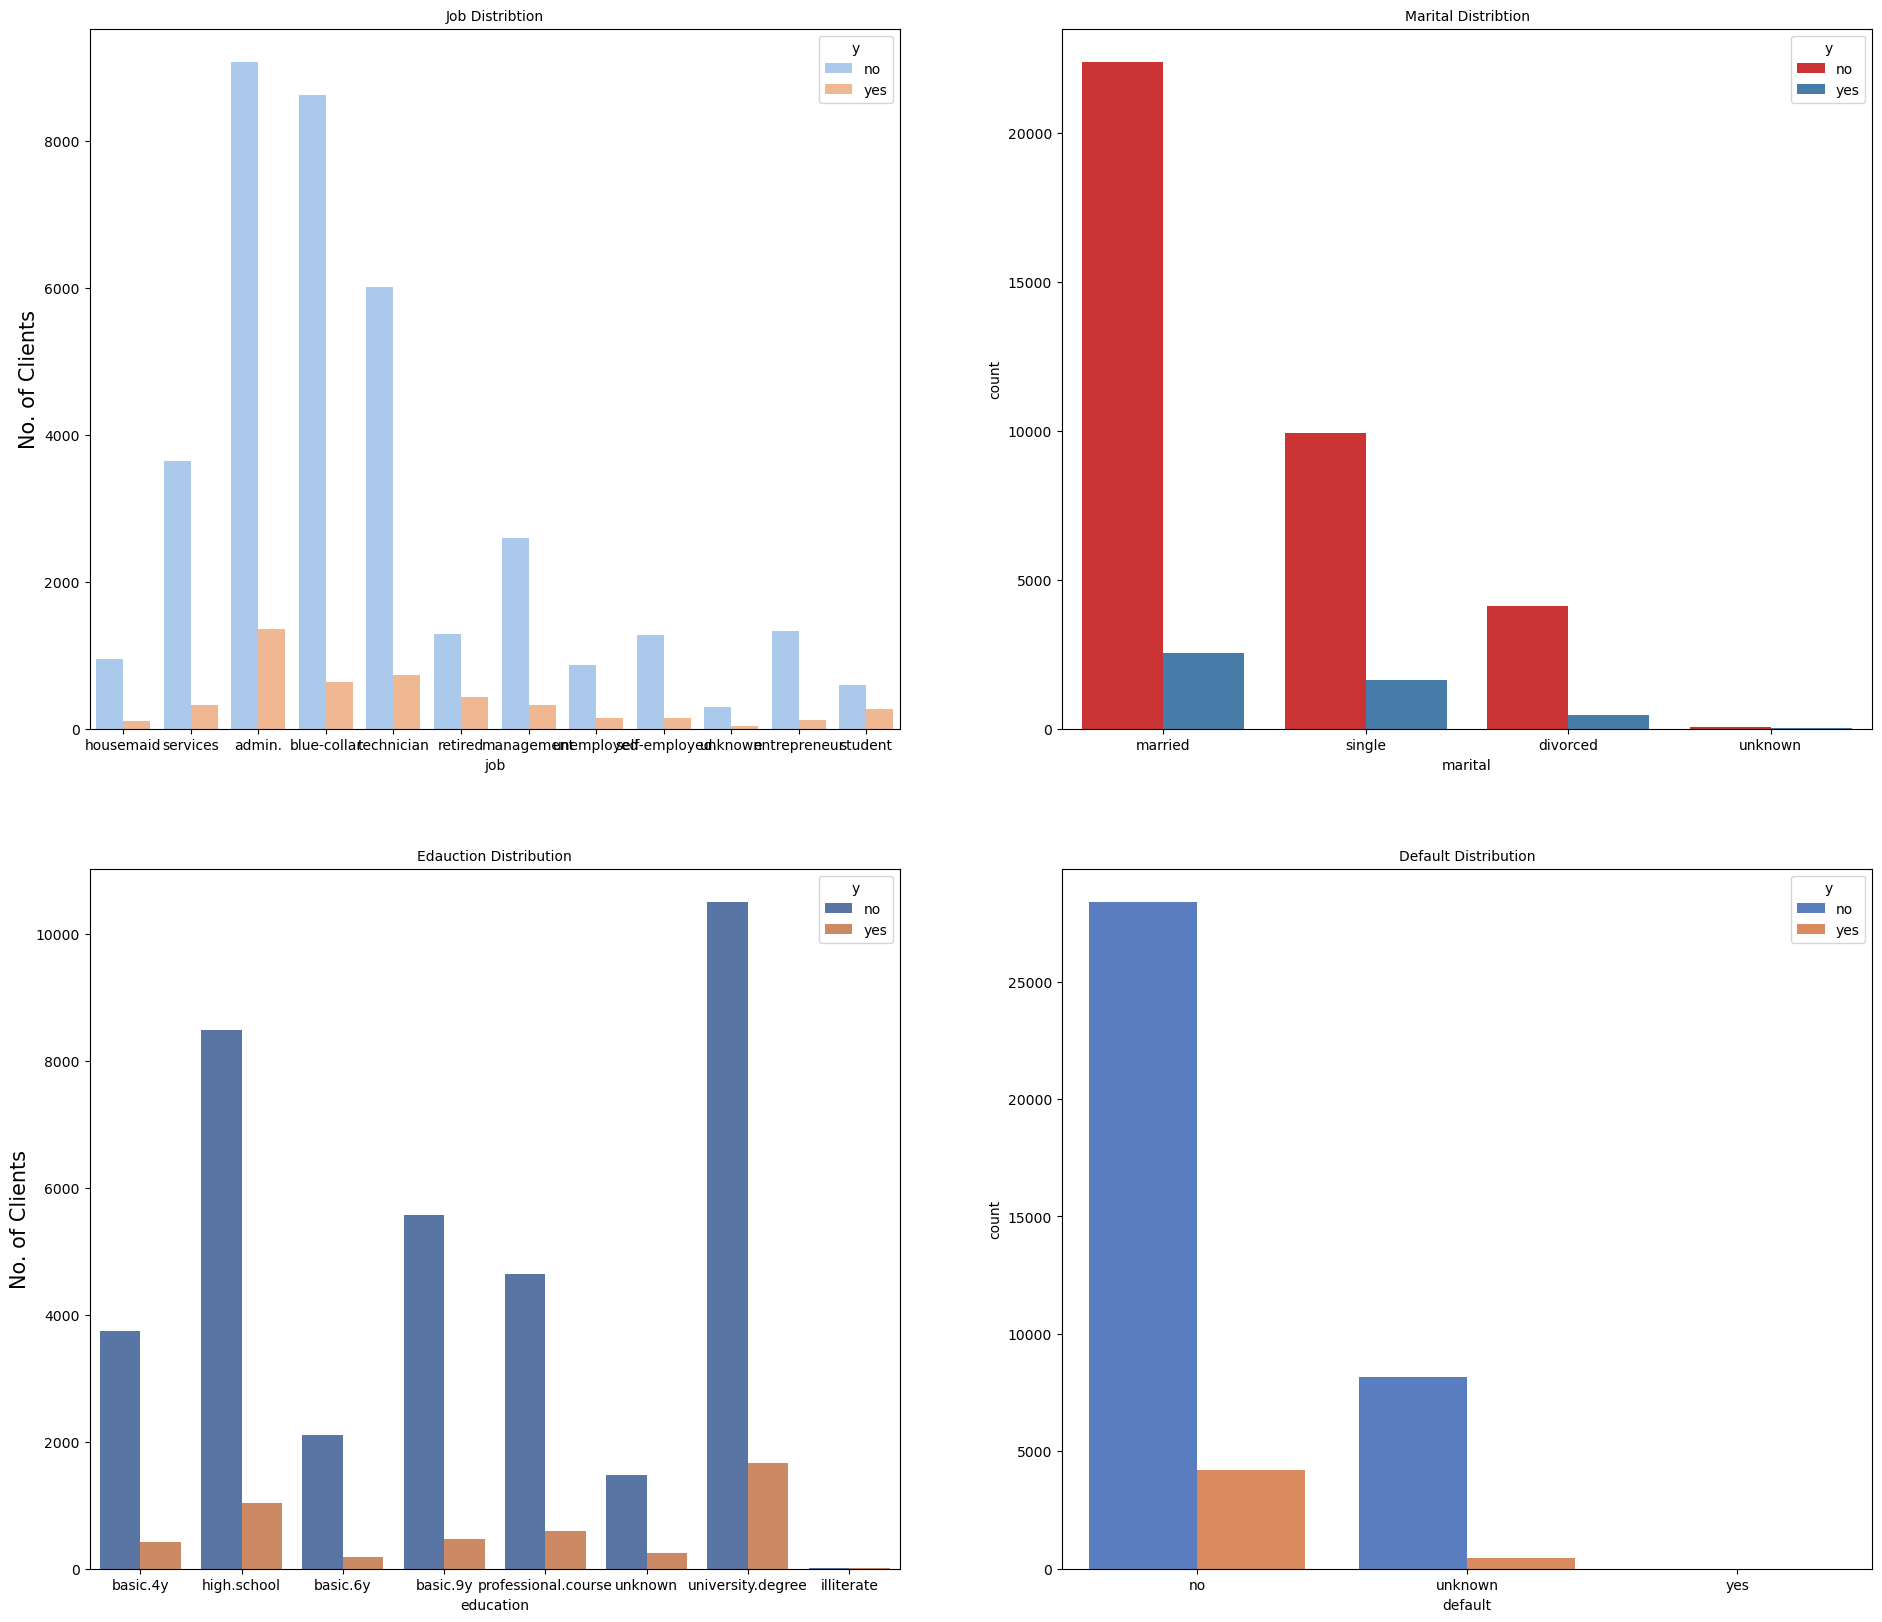

In [8]:
plt.figure(figsize=(23,20))
plt.subplot(221)
sns.countplot(data=df,x=df.job,hue='y',palette='pastel')
plt.title('Job Distribtion',size = 10)
plt.ylabel('No. of Clients',size=15)

plt.subplot(222)
sns.countplot(data=df,x=df.marital,hue='y',palette='Set1')
plt.title('Marital Distribtion',size = 10)

plt.subplot(223)
sns.countplot(data=df,x=df.education,hue='y',palette='deep')
plt.title('Edauction Distribution',size = 10)
plt.ylabel('No. of Clients',size=15)

plt.subplot(224)
sns.countplot(data=df,x=df.default,hue='y',palette='muted')
plt.title('Default Distribution',size = 10)

plt.show()

It is clear that the clients in the administrative department with the largest distribution for each variable are those who are married, have a college degree, and do not owe money. In reference to customers who make term deposits, the previously mentioned class has a larger distribution, so individuals in it will be more likely to do so than those in
in the appropriate class.



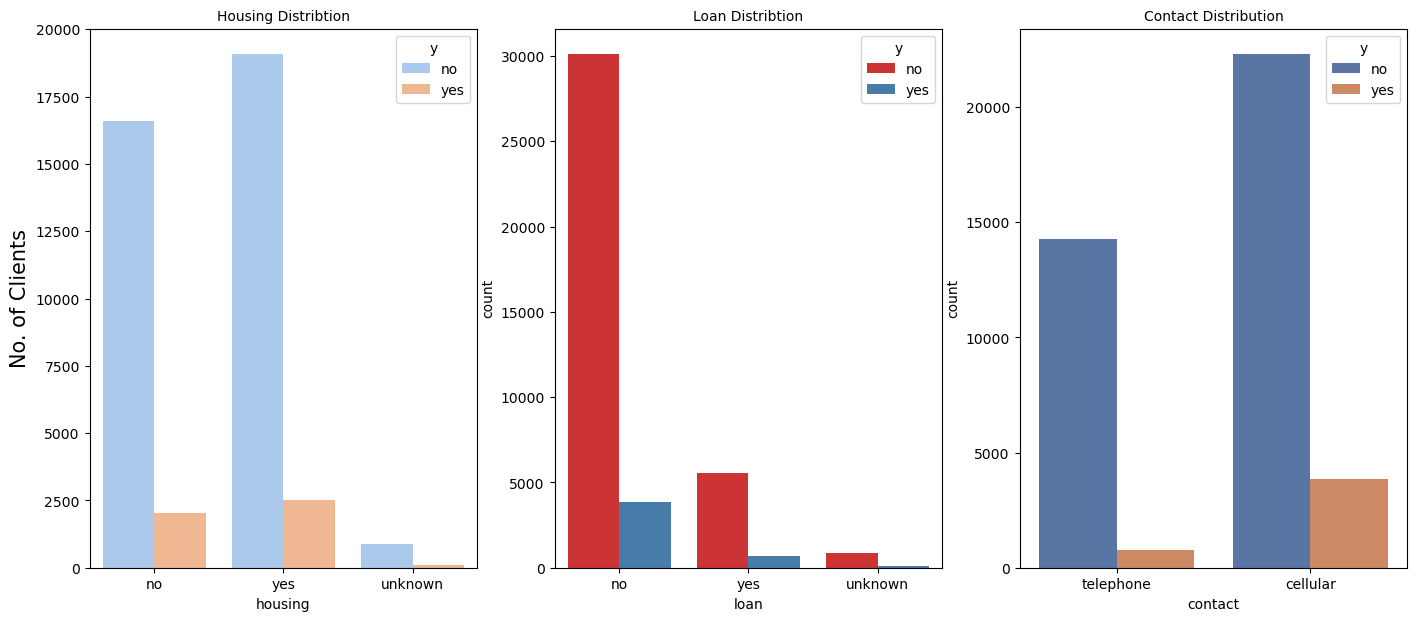

In [9]:

plt.figure(figsize=(17,7))
plt.subplot(131)
sns.countplot(data=df,x=df.housing,hue='y',palette='pastel')
plt.title('Housing Distribtion',size = 10)
plt.ylabel('No. of Clients',size=15)

plt.subplot(132)
sns.countplot(data=df,x=df.loan,hue='y',palette='Set1')
plt.title('Loan Distribtion',size = 10)

plt.subplot(133)
sns.countplot(data=df,x=df.contact,hue='y',palette='deep')
plt.title('Contact Distribution',size = 10)

plt.show()

It can be seen that customers who have home loans but no personal loans eventually take out term deposits.
Using a cell phone for communication is the best option.


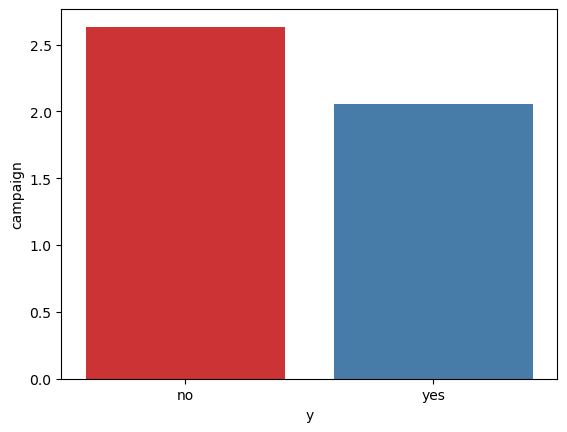

In [10]:
sns.barplot(x=df.y,y=df.campaign,errorbar=None,palette='Set1')
plt.show()

It is clear that the target class has #imbalanced data for every variable, where 'Yes' denotes the minority for each one. In this case, campaigning certainly helps, even though the percentage of "yes" votes is low.



# Preprocessing

In [11]:
df.shape

(41188, 21)

In [12]:
df.drop(["education","contact","month","day_of_week"],axis=1,inplace=True)
df.shape

(41188, 17)

In [13]:
df.dtypes

age                 int64
job                object
marital            object
default            object
housing            object
loan               object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [14]:
df.duplicated().sum()

20

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['job', 'marital', 'default', 'housing', 'loan', 'poutcome', 'y']

In [17]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    df[x]=le.fit_transform(df[x])

In [18]:
df.head()

,age,job,marital,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,0,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,0,2,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,0,0,2,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [19]:
X = df.values[:,0:-1]
Y = df.values[:,-1]

In [20]:
print(X.shape)
print(Y.shape)

(41168, 16)
(41168,)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X=scaler.transform(X)

In [22]:
print(X)

[[ 1.53304162 -0.2015213  -0.28369932 ...  0.8864658   0.71237574
   0.33160686]
 [ 1.62900022  0.9113196  -0.28369932 ...  0.8864658   0.71237574
   0.33160686]
 [-0.29017173  0.9113196  -0.28369932 ...  0.8864658   0.71237574
   0.33160686]
 ...
 [ 1.53304162  0.35489915 -0.28369932 ... -2.2252329  -1.49534987
  -2.81567569]
 [ 0.38153845  1.46774006 -0.28369932 ... -2.2252329  -1.49534987
  -2.81567569]
 [ 3.26029637  0.35489915 -0.28369932 ... -2.2252329  -1.49534987
  -2.81567569]]


In [23]:
# splitting the data
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(28817, 16)
(28817,)
(12351, 16)
(12351,)


In [25]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3319
Before OverSampling, counts of label '0':  25498
After OverSampling, the shape of train_X:  (50996, 16)
After OverSampling, the shape of train_y:  (50996,)
After OverSampling, counts of label '1':  25498
After OverSampling, counts of label '0':  25498


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [27]:
print(list(zip(Y_test,Y_pred)))

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("clasification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[10738   293]
 [  787   533]]
clasification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     11031
         1.0       0.65      0.40      0.50      1320

    accuracy                           0.91     12351
   macro avg       0.79      0.69      0.72     12351
weighted avg       0.90      0.91      0.90     12351

Accuracy of the model:  0.9125576876366286


In [29]:
#Using cross validation
#to be used for model evaluation, model durability or underfitting issues

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=3,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.90943789 0.90943789 0.90804997 0.91256072 0.91013185 0.90215128
 0.90666204 0.90385283 0.9184311  0.89968761]
0.9080403182351722


In [30]:
#model tuning
for train_value, test_value in kfold_cv.split(X_train, Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("clasification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[10740   291]
 [  789   531]]
clasification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     11031
         1.0       0.65      0.40      0.50      1320

    accuracy                           0.91     12351
   macro avg       0.79      0.69      0.72     12351
weighted avg       0.90      0.91      0.90     12351

Accuracy of the model:  0.9125576876366286


In [32]:
Y_pred_prob = classifier.predict_proba(X_test)
Y_pred_prob

array([[0.9498017 , 0.0501983 ],
       [0.90460125, 0.09539875],
       [0.9975175 , 0.0024825 ],
       ...,
       [0.95202864, 0.04797136],
       [0.99525496, 0.00474504],
       [0.9736064 , 0.0263936 ]])

In [33]:
for x in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > x, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", x, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:",cfm[0,1])

Errors at threshold  0.4 : 1055  , type 2 error : 658  , type 1 error: 397
Errors at threshold  0.41000000000000003 : 1057  , type 2 error : 675  , type 1 error: 382
Errors at threshold  0.42000000000000004 : 1061  , type 2 error : 690  , type 1 error: 371
Errors at threshold  0.43000000000000005 : 1060  , type 2 error : 707  , type 1 error: 353
Errors at threshold  0.44000000000000006 : 1066  , type 2 error : 718  , type 1 error: 348
Errors at threshold  0.45000000000000007 : 1069  , type 2 error : 730  , type 1 error: 339
Errors at threshold  0.4600000000000001 : 1065  , type 2 error : 738  , type 1 error: 327
Errors at threshold  0.4700000000000001 : 1067  , type 2 error : 750  , type 1 error: 317
Errors at threshold  0.4800000000000001 : 1076  , type 2 error : 764  , type 1 error: 312
Errors at threshold  0.4900000000000001 : 1078  , type 2 error : 776  , type 1 error: 302
Errors at threshold  0.5000000000000001 : 1080  , type 2 error : 789  , type 1 error: 291
Errors at threshold 

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("clasification report: ")
print(classification_report(Y_test,Y_pred))
acc_1=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc_1)

[[10740   291]
 [  789   531]]
clasification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     11031
         1.0       0.65      0.40      0.50      1320

    accuracy                           0.91     12351
   macro avg       0.79      0.69      0.72     12351
weighted avg       0.90      0.91      0.90     12351

Accuracy of the model:  0.9125576876366286


# Decision Tree

In [35]:
#predicting uing the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=20)
#min_sampleas_Leaf, min_samples_split, max_depth, max_features, max_Leaf_nodes

#fit the model on the data and predict the values
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion matrix
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")

print(classification_report(Y_test,Y_pred))

acc_dt=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc_dt)

[[10330   701]
 [  621   699]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     11031
         1.0       0.50      0.53      0.51      1320

    accuracy                           0.89     12351
   macro avg       0.72      0.73      0.73     12351
weighted avg       0.90      0.89      0.89     12351

Accuracy of the model:  0.8929641324589103


In [37]:
#Hyperparameter Tuinig using GridSearchCV.

from sklearn.model_selection import GridSearchCV 
model_Dt= DecisionTreeClassifier(random_state=10,splitter="best")

parameter_space = {
    'criterion': ["entropy", "gini"],
    'min_samples_leaf': [5, 10, 15],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15]
}

model_Dt = GridSearchCV(model_Dt, parameter_space, n_jobs=-1, cv=5)

In [38]:
model_Dt.fit(X_train,Y_train)
print('Best Paramter found:\n',model_Dt.best_params_)                    
print(model_Dt.best_score_) 

Best Paramter found:
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.9110595506065821


In [39]:
model_DT.score(X_train,Y_train)

1.0

In [40]:
Y_pred= model_Dt.predict(X_test)

#Evalute
acc_dtt=accuracy_score(Y_test,Y_pred)
print(f'Confusion Matrix : \n{confusion_matrix(Y_test,Y_pred)}')
print(f'Classification Report : \n{classification_report(Y_test,Y_pred)}')
print(f'Accuracy of the model : {acc_dtt}')

Confusion Matrix : 
[[10610   421]
 [  584   736]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     11031
         1.0       0.64      0.56      0.59      1320

    accuracy                           0.92     12351
   macro avg       0.79      0.76      0.77     12351
weighted avg       0.91      0.92      0.92     12351

Accuracy of the model : 0.9186300704396405


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
 
model_RandomForest=RandomForestClassifier(n_estimators=100,
                                          random_state=10
                                          , bootstrap=True,
                                         n_jobs=-1)
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
 
Y_pred=model_RandomForest.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion matrix
acc_rf=accuracy_score(Y_test,Y_pred)
print(confusion_matrix(Y_test,Y_pred))
print(acc_rf)
print(classification_report(Y_test,Y_pred))

[[10620   411]
 [  616   704]]
0.916848838150757
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     11031
         1.0       0.63      0.53      0.58      1320

    accuracy                           0.92     12351
   macro avg       0.79      0.75      0.77     12351
weighted avg       0.91      0.92      0.91     12351



In [43]:
#Hyperparameter Tuinig using GridSearchCV.

model_rf= RandomForestClassifier(random_state=10,n_estimators=100,criterion = "gini")

parameter_space = {
    'min_samples_leaf': [2, 4, 5],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

model_rf = GridSearchCV(model_rf, parameter_space, n_jobs=-1, cv=5)

In [44]:
model_rf.fit(X_train,Y_train)
print('Best Paramter found:\n',model_rf.best_params_)                    
print(model_rf.best_score_)

Best Paramter found:
 {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.9123434174047921


In [45]:
Y_pred= model_rf.predict(X_test)

#Evalute
acc_rft=accuracy_score(Y_test,Y_pred)
print(f'Confusion Matrix : \n{confusion_matrix(Y_test,Y_pred)}')
print(f'Classification Report : \n{classification_report(Y_test,Y_pred)}')
print(f'Accuracy of the model : {acc_rft}')

Confusion Matrix : 
[[10708   323]
 [  661   659]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     11031
         1.0       0.67      0.50      0.57      1320

    accuracy                           0.92     12351
   macro avg       0.81      0.73      0.76     12351
weighted avg       0.91      0.92      0.92     12351

Accuracy of the model : 0.9203303376244838


In [46]:
#Tabulation

df_tab = pd.DataFrame()
df_tab['Model_name'] = ['Logistic Regression', 'Tune_LogisticRegression', 'Decision Trees', 'Tuned_Decision Trees',
                       'Random Forest', 'Tuned_Random Forest']
df_tab['Accuracies'] = [acc*100, acc_1*100, acc_dt*100, acc_dtt*100, acc_rf*100, acc_rft*100]

df_tab.sort_values("Accuracies",ascending=False)

,Model_name,Accuracies
5,Tuned_Random Forest,92.033034
3,Tuned_Decision Trees,91.863007
4,Random Forest,91.684884
0,Logistic Regression,91.255769
1,Tune_LogisticRegression,91.255769
2,Decision Trees,89.296413


We observe that the tuned Random Forest model provides the highest accuracy with 91.63% among all the models we have tested